# <center> Modelagem: DMC 2013 </center>
Este notebook contém o código referente à etapa de **mineração de dados e avaliação**<br>
Este código é parte do livro: **Ciência dos Dados pelo Processo de KDD**<br>
Autor: Rosalvo Neto<br>
Link do Livro:

## Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
import sklearn.metrics as metrics

import matplotlib.pyplot as plt


## Carregando os dados de treinamento e teste

### Treinamento

In [2]:
TRN_X = pd.read_csv('TRN_X.csv')
TRN_X.head()

,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,...,onlineStatus_ausente,onlineStatus_n,onlineStatus_y,availability_ausente,availability_completely not determinable,availability_completely not orderable,availability_completely orderable,availability_mainly not orderable,availability_mainly orderable,availability_mixed
0,0.26087,0.0,0.001848,0.005,0.009998,0.008570,0.000518,0.009259,0.008570,0.008570,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.26087,0.0,0.004378,0.000,0.012020,0.022521,0.009475,0.000000,0.012349,0.016941,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.26087,0.0,0.015830,0.055,0.001665,0.004284,0.000950,0.018519,0.001427,0.004284,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.26087,0.0,0.001984,0.020,0.000832,0.000713,0.000172,0.009259,0.000713,0.000713,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.26087,0.0,0.130493,0.225,0.002165,0.025707,0.009450,0.037037,0.002856,0.003979,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
TRN_Y = pd.read_csv('TRN_Y.csv')
TRN_Y.head()

,order
0,1
1,1
2,1
3,0
4,1


### Teste

In [4]:
TST_X = pd.read_csv('TST_X.csv')
TST_X.head()

,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,...,onlineStatus_ausente,onlineStatus_n,onlineStatus_y,availability_ausente,availability_completely not determinable,availability_completely not orderable,availability_completely orderable,availability_mainly not orderable,availability_mainly orderable,availability_mixed
0,0.782609,1.0,0.028944,0.055,0.002832,0.005713,0.001796,0.046296,0.002427,0.005713,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.782609,1.0,0.129967,0.080,0.005832,0.004999,0.001512,0.018519,0.004999,0.004999,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.782609,1.0,0.342973,0.595,0.001332,0.008564,0.028197,0.111111,0.001784,0.005707,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.782609,1.0,0.132231,0.760,0.000665,0.034284,0.048751,0.037037,0.001427,0.002141,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.782609,1.0,0.002231,0.010,0.004998,0.004284,0.000518,0.009259,0.004284,0.004284,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
TST_Y = pd.read_csv('TST_Y.csv')
TST_Y.head()

,prediction
0,1
1,1
2,1
3,0
4,0


## Classificador KNN

K-Nearest Neighbor (KNN) é um classificador baseado em instâncias, ou seja, o modelo é representado pelos exemplos de treinamento (COVER; HART, 2006). O valor K representa a quantidade de exemplos semelhantes do conjunto de treinamento utilizado para classificação. Para mais detalhes, ver Capítulo 2.

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(TRN_X, TRN_Y.order.to_numpy())

#É importante notar que a variável alvo deve ser convertida para um numpy array -> TRN_Y.order.to_numpy()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Avaliando o classificador

Conforme visto no Capítulo 4, avaliar o desempenho de um classificador com o mesmo conjunto utilizado na sua construção, não fornece uma boa estimativa de como será a sua predição em dados nunca antes vistos, pois a estimativa será otimista. Para este exemplo, estamos usando <b>Hold-out</b> como método de avaliação e as seguintes métricas de avaliação:

- Matriz de Confusão
- Acurácia
- Precisão
- Sensibilidade
- Especificidade
- Área sob a curva ROC

In [7]:
# Recuperando a resposta do modelo para o conjunto de teste e armazenando no vetor pred
pred = knn.predict(TST_X)

In [8]:
# Gerando a Matriz de Confusão (linhas = real | colunas = previsto)
cm = confusion_matrix(TST_Y.prediction.to_numpy(), pred)
df_cm = pd.DataFrame(cm)
# Mudandando a ordem para vir primeiro 1 e depois 0
df_cm = df_cm[[1, 0]]
df_cm = df_cm.sort_index(ascending=False)
df_cm

,1,0
1,2166,159
0,202,2584


In [9]:
# Recuperando os valores da matriz de confusão

# Verdadeiro positivo
a = df_cm.iloc[0,0]

# Falso positivo
b = df_cm.iloc[1,0]

# Falso negativo
c = df_cm.iloc[0, 1]

# Verdadeiro negativo
d = df_cm.iloc[1, 1]


In [10]:
# calculando a acurácia do modelo
(a + d) / (a + b + c + d)

0.929368029739777

In [11]:
# calculando a precisão do modelo
a  / (a + b)

0.9146959459459459

In [12]:
# calculando a sensibilidade do modelo
a / (a + c)

0.9316129032258065

In [13]:
# calculando a especificidade do modelo
d / (b + d)

0.927494615936827

In [14]:
# Calculando a área sob a curva ROC
roc_auc = roc_auc_score(TST_Y.prediction.to_numpy(), pred)
roc_auc

0.9295537595813168

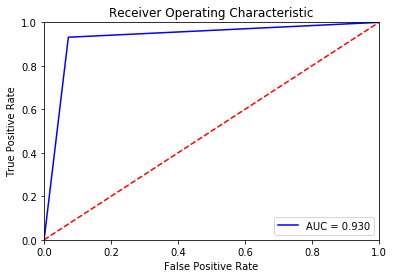

In [15]:
# Gráfico da área sob a curva ROC

fpr, tpr, _ = metrics.roc_curve(TST_Y.prediction.to_numpy(), pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()